In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv("used_cars_data.csv")

In [56]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [57]:
data.shape

(7253, 14)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [59]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [60]:
#nunique - identify the continuous and categorical columns in the data
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [61]:
#isnull in Percentage
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%

In [62]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [63]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [64]:
data.dropna(subset=["Mileage", "Engine", "Power", "Seats"], axis=0, inplace=True)

In [65]:
data = data.drop('New_Price', axis=1)

In [72]:
# Fill missing values with appropriate methods
# Move the Mileage cleanup to before filling NA values
data['Mileage'] = data['Mileage'].astype(str).str.replace(' km/kg', '').str.replace(' kmpl', '').astype(float).round().astype(int) # Convert Mileage to numeric before filling NA
data['Mileage'].fillna(data['Mileage'].mean(), inplace=True)

# Clean up the Engine column before calculating the mean
data['Engine'] = data['Engine'].astype(str).str.lower().str.replace(' cc', '').astype(float).round().astype(int) # Convert all strings to lowercase and remove spaces before 'cc'
data['Engine'].fillna(data['Engine'].mean(), inplace=True)

# Clean up Power column *before* filling NA
data['Power'] = data['Power'].astype(str).str.lower().str.replace(' bhp', '').str.replace('null', '0').astype(float).round().astype(int) # Convert 'null' to 0
data['Power'].fillna(data['Power'].mean(), inplace=True) # Now you can fill NA after cleaning

data['Seats'].fillna(data['Seats'].median(), inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)

# Remove specific substrings from columns and convert to appropriate types
# This line is now moved up
# data['Mileage'] = data['Mileage'].astype(str).str.replace(' km/kg', '').str.replace(' kmpl', '').astype(float).round().astype(int)
# This line is now moved up
# data['Power'] = data['Power'].astype(str).str.replace(' bhp', '').astype(float).round().astype(int)

# Convert Seats and Price columns to float
data['Seats'] = data['Seats'].astype(float)
data['Price'] = data['Price'].astype(float)

In [73]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,27,998,58,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,20,1582,126,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199,89,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,21,1248,89,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,141,5.0,17.74,11


In [74]:
data['Brand'] = data.Name.str.split().str.get(0)

In [75]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [76]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [77]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect.

In [78]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,13,2179,188,5.0,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0,2179,115,5.0,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,17,1998,112,5.0,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,13,2179,188,5.0,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,17,1998,189,4.0,35.67,7,Mini,CooperConvertible


In [79]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [80]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,27,998,58,5.0,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,20,1582,126,5.0,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199,89,5.0,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,21,1248,89,7.0,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,141,5.0,17.74,11,Audi,A4New


**EDA**

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7198.0,2013.391081,3.235298,1996.00,2011.0000,2014.00,2016.000000,2019.0
Kilometers_Driven,7198.0,58631.777160,84694.798141,171.00,34000.0000,53253.00,73000.000000,6500000.0
Mileage,7198.0,18.194637,4.488144,0.00,15.0000,18.00,21.000000,34.0
Engine,7198.0,1616.900389,595.034653,624.00,1198.0000,1493.00,1968.000000,5998.0
Power,7198.0,110.832176,55.034095,0.00,74.0000,92.00,138.000000,616.0
Seats,7198.0,5.279800,0.811759,0.00,5.0000,5.00,5.000000,10.0
Price,7198.0,9.501647,10.209330,0.44,3.8725,6.75,9.501647,160.0
Car_Age,7198.0,10.608919,3.235298,5.00,8.0000,10.00,13.000000,28.0


In [82]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7198,2015,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7198,11,Mumbai,943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7198.0,NaN,NaN,NaN,2013.391081,3.235298,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7198.0,NaN,NaN,NaN,58631.77716,84694.798141,171.0,34000.0,53253.0,73000.0,6500000.0
Fuel_Type,7198,4,Diesel,3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7198,2,Manual,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7198,4,First,5921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7198.0,NaN,NaN,NaN,18.194637,4.488144,0.0,15.0,18.0,21.0,34.0
Engine,7198.0,NaN,NaN,NaN,1616.900389,595.034653,624.0,1198.0,1493.0,1968.0,5998.0
Power,7198.0,NaN,NaN,NaN,110.832176,55.034095,0.0,74.0,92.0,138.0,616.0


In [83]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


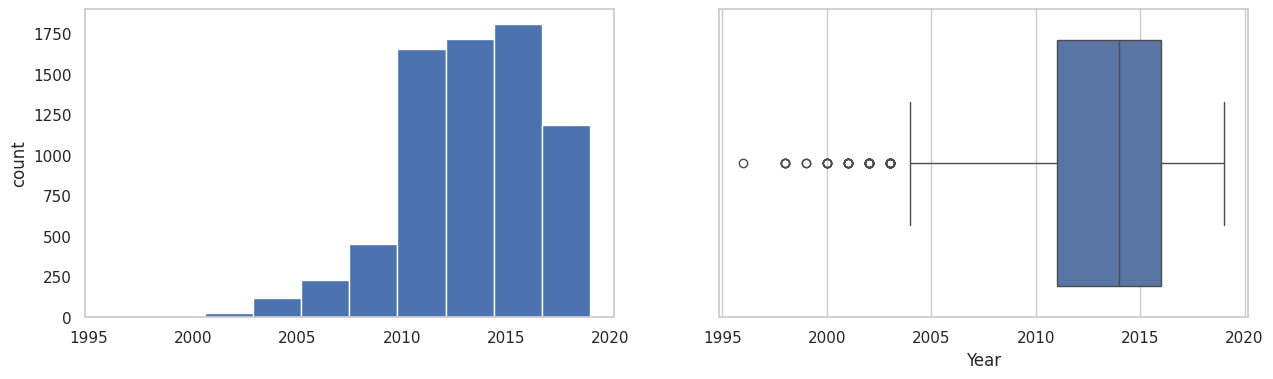

Kilometers_Driven
Skew : 61.47


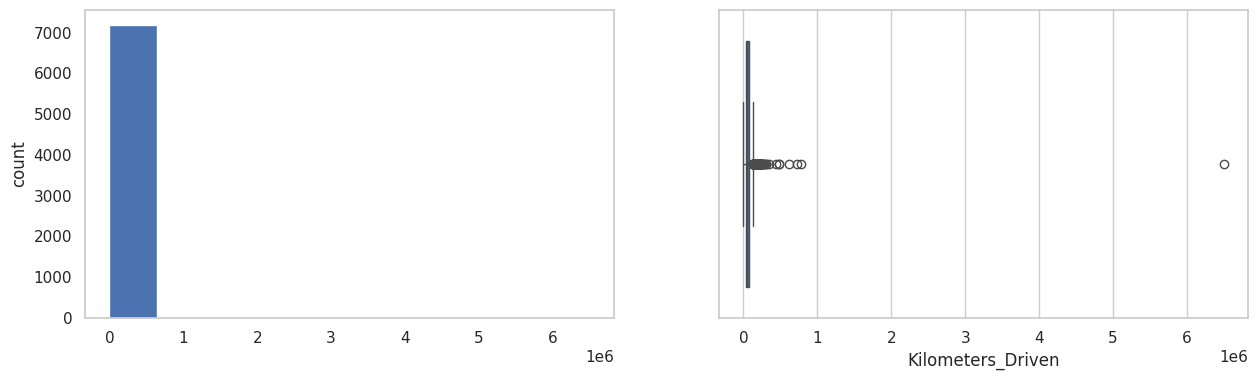

Mileage
Skew : -0.38


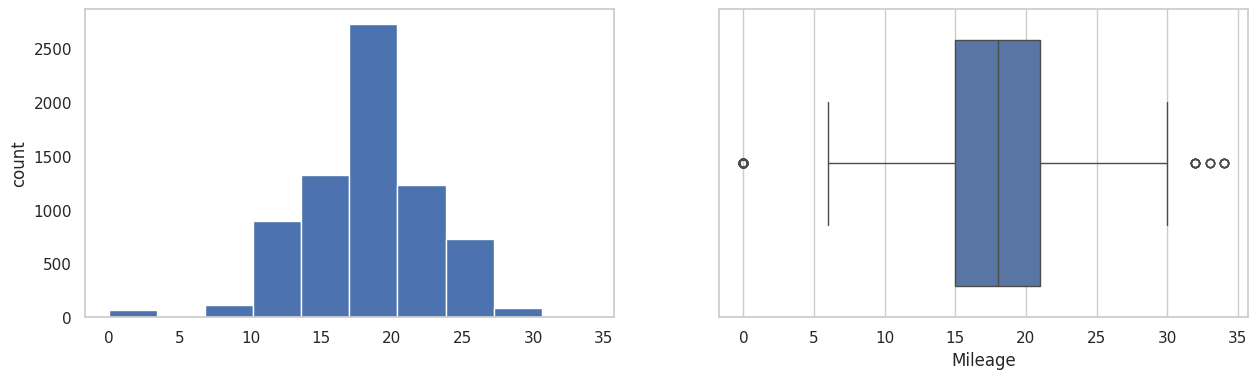

Engine
Skew : 1.42


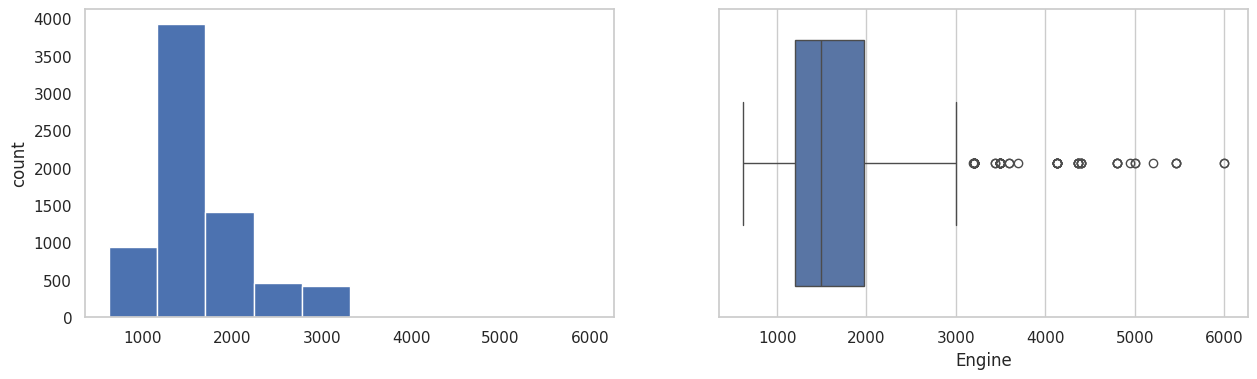

Power
Skew : 1.73


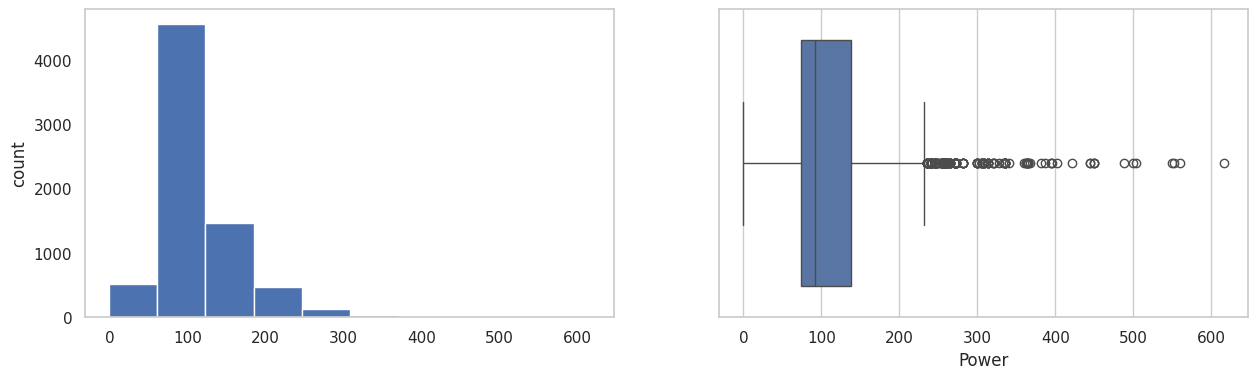

Seats
Skew : 1.9


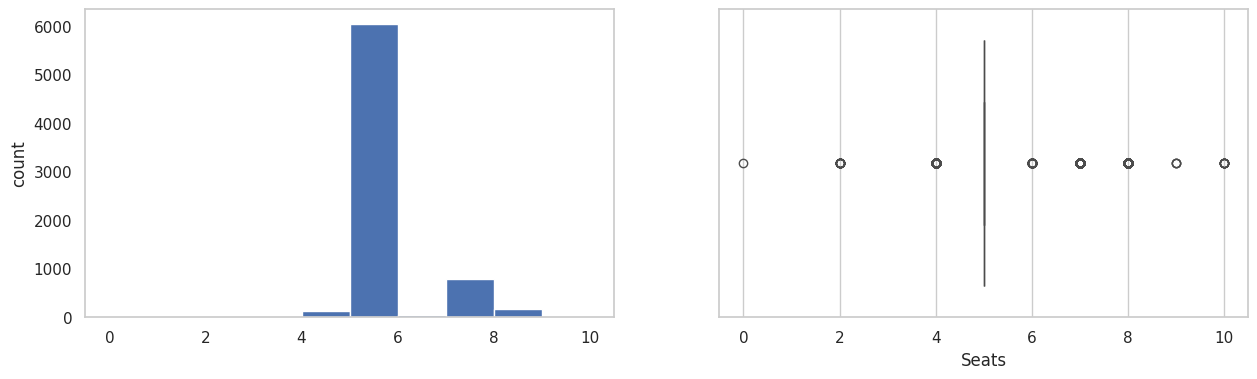

Price
Skew : 3.66


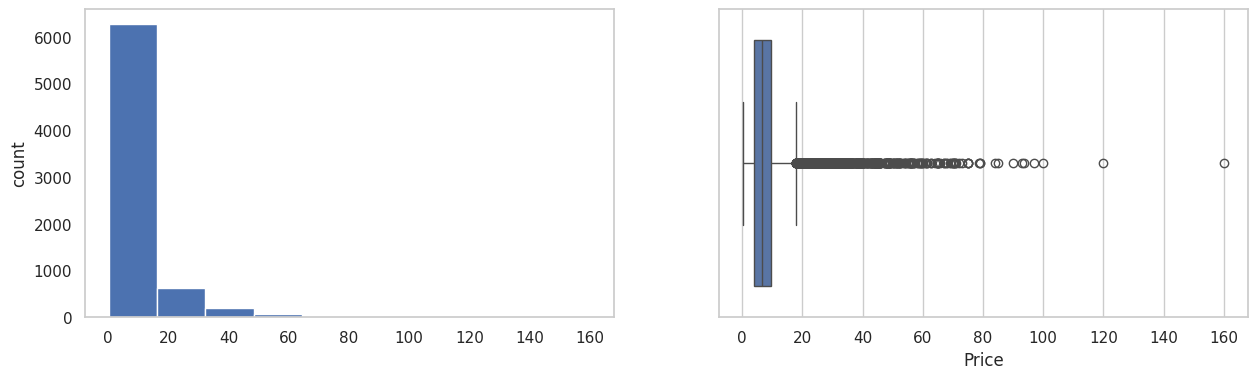

Car_Age
Skew : 0.84


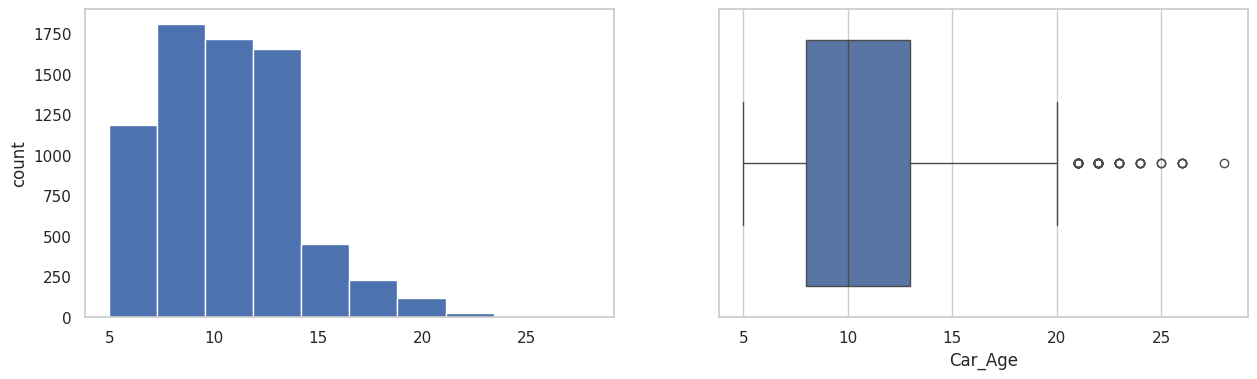

In [84]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)

    # Handle missing and infinite values
    valid_data = data[col].dropna()
    valid_data = valid_data[np.isfinite(valid_data)]

    if valid_data.size > 0:
        sns.boxplot(x=valid_data.astype(float))
    else:
        print(f"No valid data to plot for column: {col}")
        print(f"Unique values in {col}: {data[col].unique()}")  # Print unique values to investigate further

    plt.show()



*   Price and Kilometers Driven are right skewed for this data to be transformed
   
  



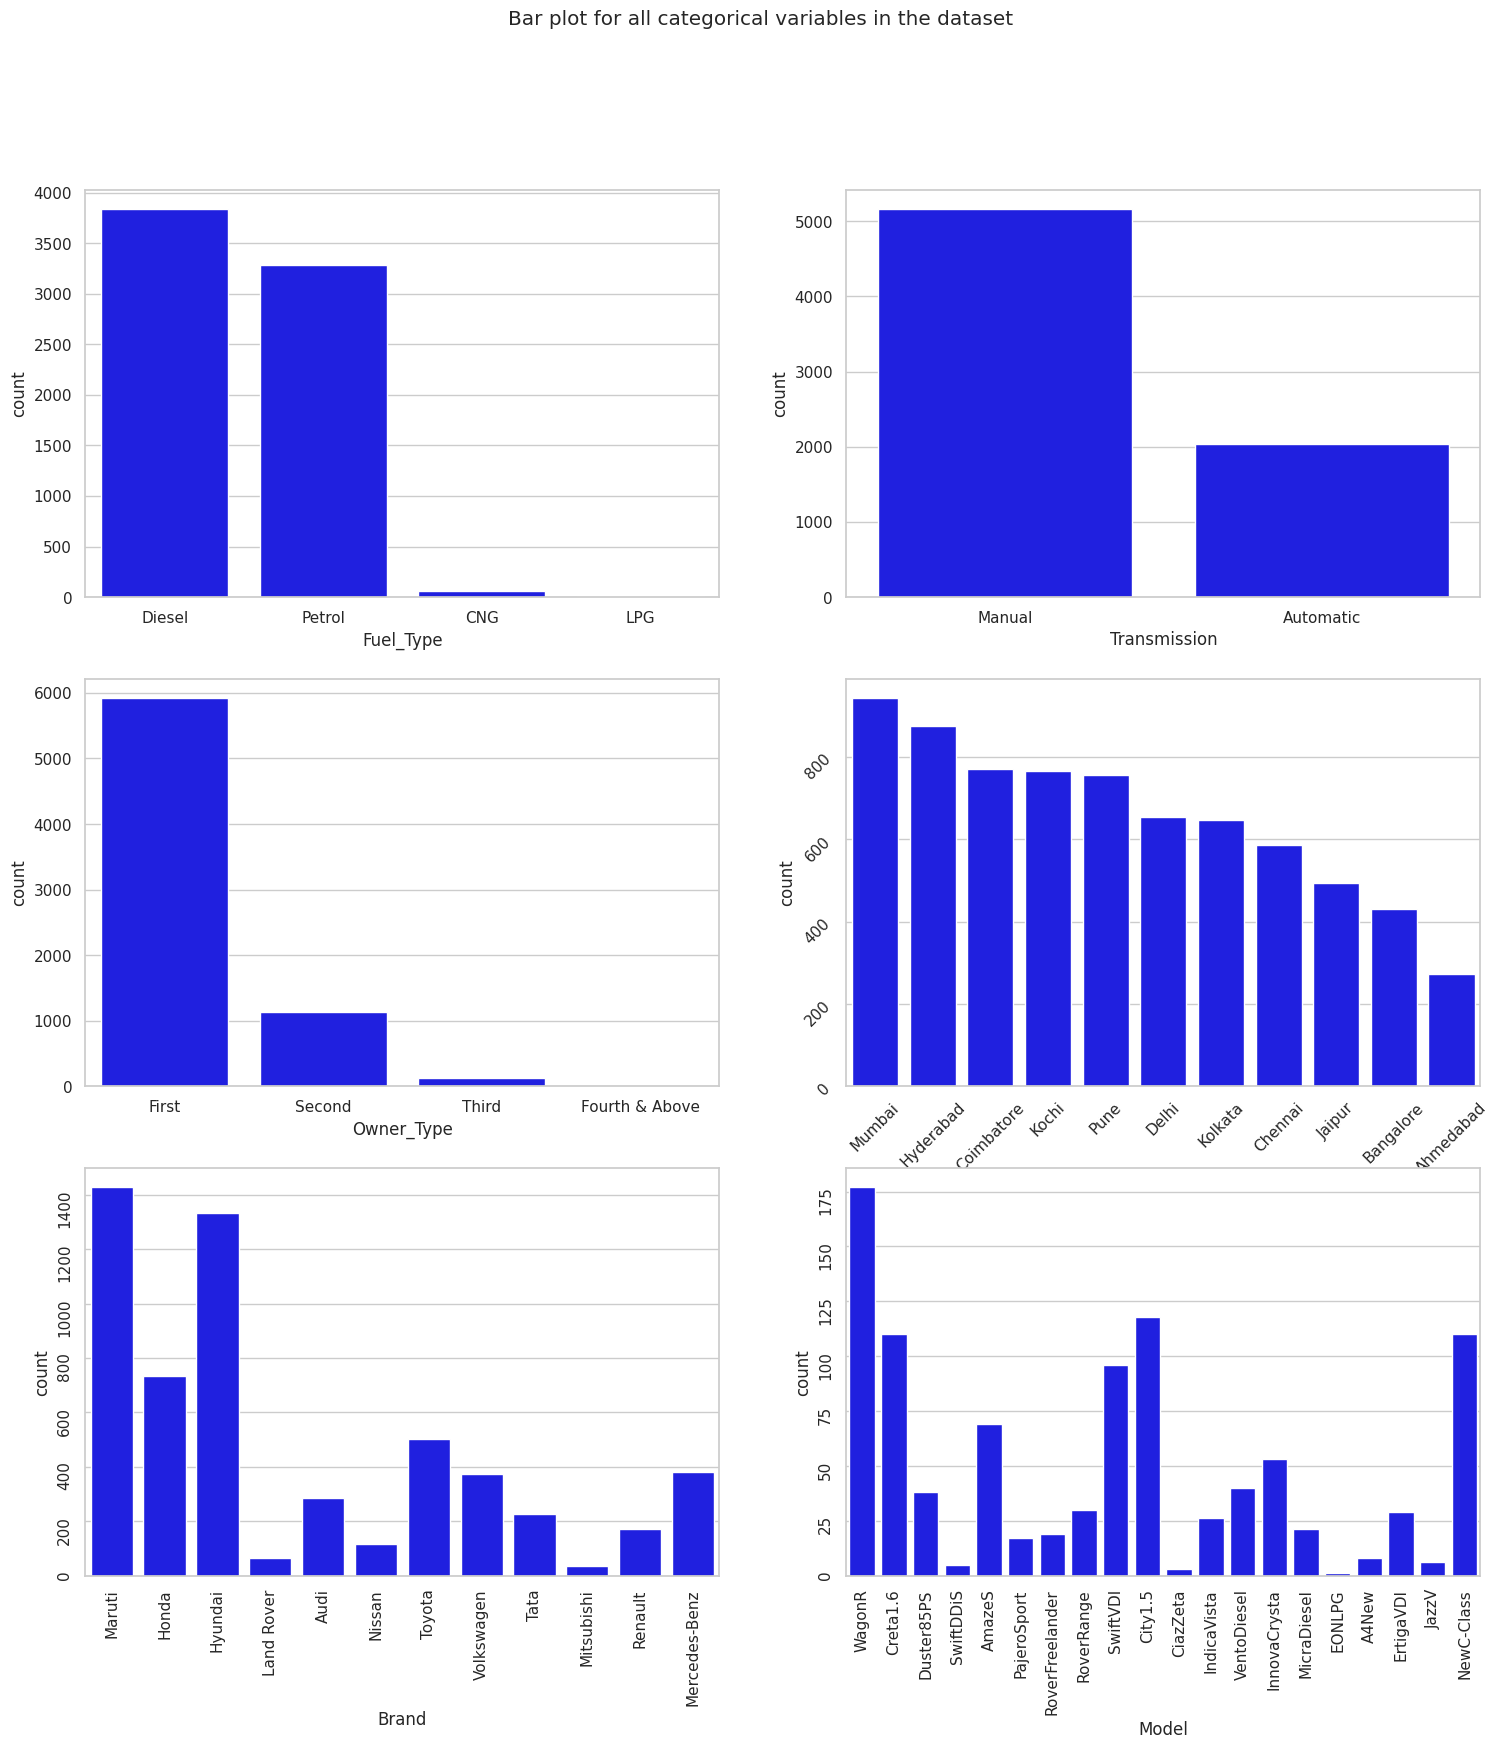

In [85]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price




*   Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
*   ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
*   ~72% of cars have manual transmission
*   ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
*   ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
*   WagonR ranks first among all models which are available for purchase





In [86]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [87]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 7198 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7198 non-null   object 
 1   Location               7198 non-null   object 
 2   Year                   7198 non-null   int64  
 3   Kilometers_Driven      7198 non-null   int64  
 4   Fuel_Type              7198 non-null   object 
 5   Transmission           7198 non-null   object 
 6   Owner_Type             7198 non-null   object 
 7   Mileage                7198 non-null   int64  
 8   Engine                 7198 non-null   int64  
 9   Power                  7198 non-null   int64  
 10  Seats                  7198 non-null   float64
 11  Price                  7198 non-null   float64
 12  Car_Age                7198 non-null   int64  
 13  Brand                  7198 non-null   object 
 14  Model                  7197 non-null   object 
 15  Kilometer

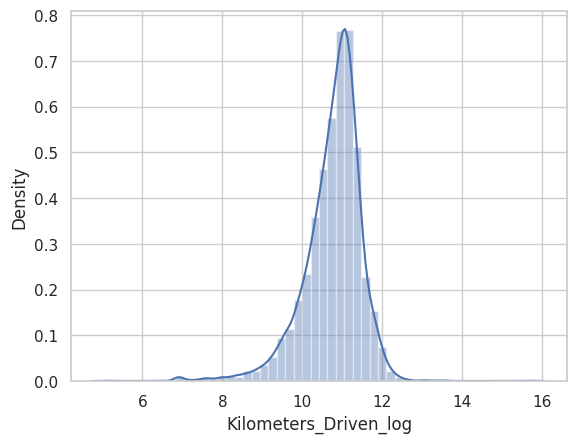

In [88]:
# Assuming data["Kilometers_Driven"] is your original feature
data["Kilometers_Driven_log"] = np.log(data["Kilometers_Driven"])

# Plotting the distribution of the log-transformed feature
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

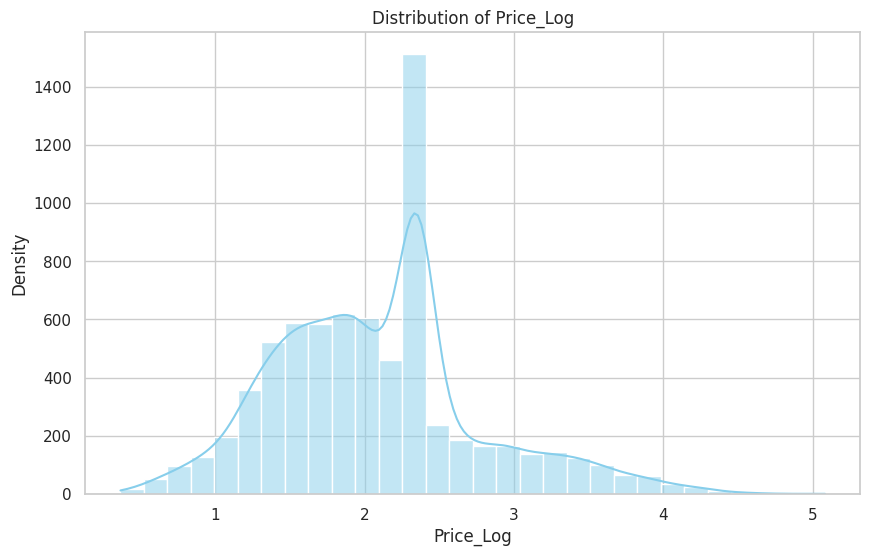

In [89]:
# Apply log transformation to 'Price' to handle skewness and outliers
data['Price_log'] = np.log1p(data['Price'])  # np.log1p is used to avoid log(0)

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_log'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Price_Log')
plt.xlabel('Price_Log')
plt.ylabel('Density')

# Show the plot
plt.show()

EDA Bivariate Analysis

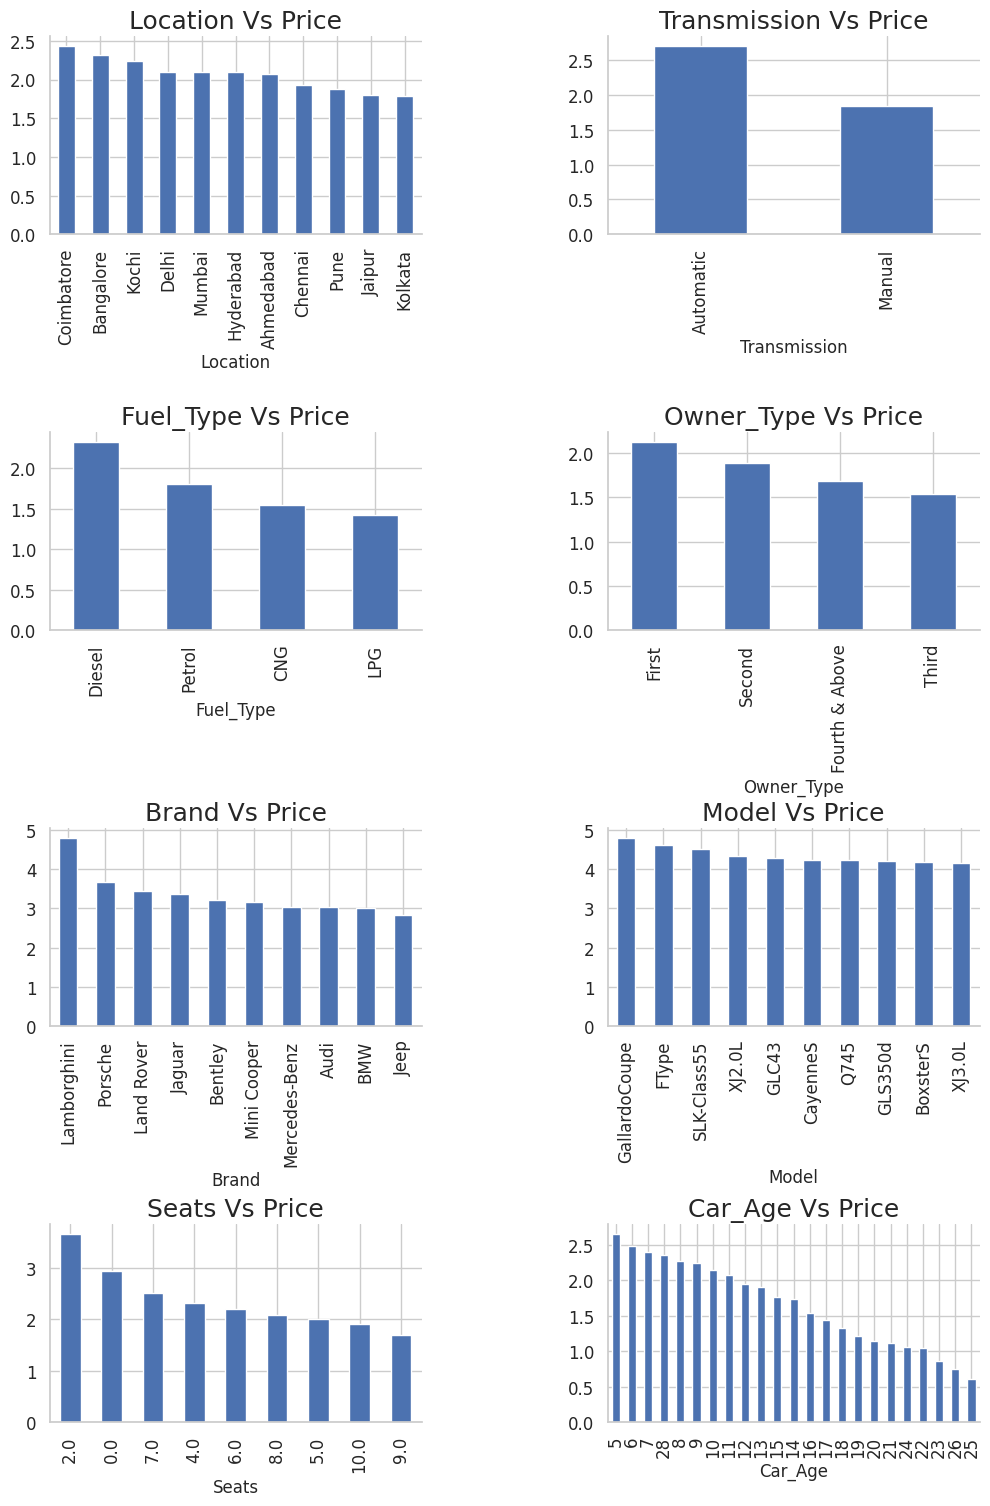

In [90]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()


**INSIGHTS**
*   The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
*   The latest model cars are high in price
*   Automatic cars have more price than manual cars.
*   Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
*   First-owner cars are higher in price, followed by a second
*   The third owner’s price is lesser than the Fourth and above
*   Lamborghini brand is the highest in price
*  Gallardocoupe Model is the highest in price
*   2 Seater has the highest price followed by 7 Seater







EDA Multivariate **Analysis**

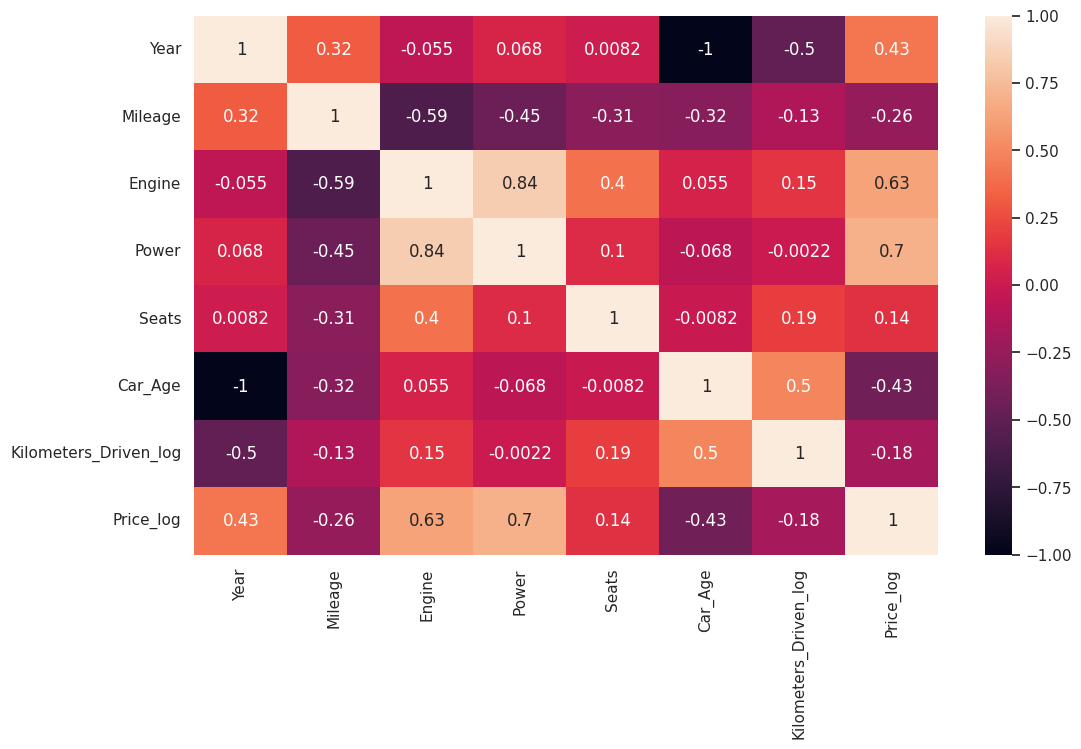

In [91]:
#A heat map is widely been used for Multivariate Analysis
plt.figure(figsize=(12, 7))
# Select only numeric columns for correlation calculation
numeric_data = data.drop(['Kilometers_Driven','Price'],axis=1).select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()



*   car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase of car has a negative correlation with Mileage this makes sense
*   Car age has a negative correlation with Price
*   Price is moderately positive in correlation to year
*   The engine has a strong positive correlation to Power 0.84
*   Price has a positive correlation to Engine 0.63 as well Power 0.77
*   Mileage has correlated to Engine, Power, and Price negatively




In [92]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

67

In [94]:
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
# Reset the index after groupby to match the original DataFrame
data['Seats'] = data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median())).reset_index(level=[0,1], drop=True)
data['Engine'] = data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median())).reset_index(level=[0,1], drop=True)
data['Power'] = data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median())).reset_index(level=[0,1], drop=True)